# 1load data

In [230]:
!pwd

/Users/apple/Desktop/deep learning/NLP/2


In [242]:
database = '/Users/apple/Desktop/deep learning/NLP/2/sqlResult_1558435.csv'

In [243]:
import os
os.path.exists(database)#检查database路径是否正确

True

# 语料编码问题
查询Python各语言的编码：https://docs.python.org/2.4/lib/standard-encodings.html
Python提供编码自动检测方法: https:/https://chardet.readthedocs.io/en/latest/usage.html/chardet.readthedocs.io/en/latest/usage.html

In [251]:
import pandas as pd
dataframe = pd.read_csv(database,encoding='gb18030')
dataframe.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [245]:
all_articles = dataframe['content'].tolist()#tolist()将矩阵转换为一个以列表为元素的列表
all_articles[:1]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n']

# 2.去除非法字符（invalid，无效）
观察数据可以发现语料中存在一些无效字符，如\r \n \u3000 \u3000，可以使用正则表达式去掉；

In [254]:
import re

In [255]:
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

In [257]:
token('\u3000\u30006月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22日，在222只纳入MSCI指数的A股股票中，银行股全线飘红')

'6月21日 A股纳入MSCI指数尘埃落定 但当天被寄予厚望的券商股并未扛起反弹大旗 22日 在222只纳入MSCI指数的A股股票中 银行股全线飘红'

In [258]:
all_articles = [token(str(a)) for a in all_articles]
all_articles[:1]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息']

In [259]:
#去掉空格
TEXT = ''
for a in all_articles:
    TEXT += a
print('length of TEXT:{}'.format(len(TEXT)))

length of TEXT:37412506


# reduce 方法

In [260]:
from functools import reduce
text_from_reduce = reduce(lambda a1, a2: a1 + a2, all_articles[:100])

# 正则表达式Note
地址：https://regexone.com/

In [263]:
string = '90120 &*&*&* this is a BIG thing BI'

In [264]:
pattern = 'BIG*'

In [265]:
re.findall(pattern, string)

['BIG', 'BI']

In [ ]:
pattern = '\w+'

In [266]:
re.findall(pattern, string)

['BIG', 'BI']

# Get all tokens

In [267]:
import jieba

In [268]:
def cut(string):
    return list(jieba.cut(string))

In [269]:
cut('这是一个测试')

['这是', '一个', '测试']

In [270]:
ALL_TOKENS = cut(TEXT)

In [271]:
ALL_TOKENS[:20]

['此外',
 ' ',
 '自',
 '本周',
 ' ',
 '6',
 '月',
 '12',
 '日',
 ' ',
 '起',
 ' ',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型']

# 去除空格
后序检查词频中发现遗漏特殊字符n；

In [272]:
valid_tokens = [t for t in ALL_TOKENS if t.strip() and  t != 'n']

In [273]:
len(valid_tokens)

17221785

In [274]:
valid_tokens[:20]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日',
 '起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已']

# Get the frequence of words

In [280]:
from collections import Counter

In [281]:
Counter({1, 1, 2, 2, 2, 3, 1, 0})

Counter({0: 1, 1: 1, 2: 1, 3: 1})

In [282]:
words_count = Counter(valid_tokens)

In [283]:
words_count.most_common(10)

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

# 单词的频率分布

In [284]:
frequences = [f for w, f in words_count.most_common(100)]

In [285]:
x = [i for i in range(len(frequences))]

In [286]:
len(frequences)

100

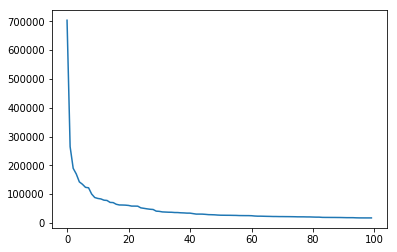

In [287]:
plt.plot(x, frequences)

# 使用log分布放大原有词频分布

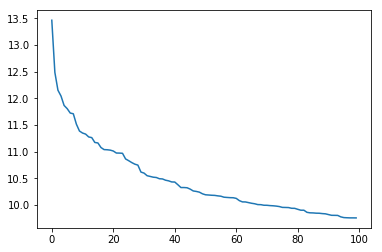

In [288]:
import numpy as np
plt.plot(x, np.log(frequences))

# 统计每个词的概率

In [289]:
frequences_all = [f for w, f in words_count.most_common()]

In [290]:
frequences_sum = sum(frequences_all)

In [291]:
frequences_sum

17221785

In [292]:
#获得一个单词在词库中出现的概率
def get_prob(word):
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word] / frequences_sum
    return esp

In [293]:
get_prob('我们')

0.0011602746172943166

# 句子的概率等于所有单词出现的概率之和，这里假设单词之间相互独立

In [294]:
#计算numbers中所有元素累乘
def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

In [295]:
product([1, 2, 3, 4, 10])

240

In [297]:
#one_gram将每个单词出现的概率累乘
def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [298]:
language_model_one_gram('广交会下个月举办')

1.4093284706718309e-14

In [299]:
language_model_one_gram('这是一种常见的诈骗手法')

1.0458111049344169e-22

In [300]:
sentences = """
这是一个比较正常的句子
这是一个比较罕见的句子
小明毕业于清华大学
小明毕业于秦华大学
""".split()

In [301]:
for s in sentences:
    print(s, language_model_one_gram(s))

这是一个比较正常的句子 7.429984647015532e-22
这是一个比较罕见的句子 2.295126147507416e-22
小明毕业于清华大学 3.039960976514903e-18
小明毕业于秦华大学 5.813337476916057e-24


# 对比不同的句子，检查频率

In [302]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚 今晚我去吃火锅"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    better =  s1 if p1 > p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + '{} with probility {}'.format(s1, p1))
    print('-'*4 + '{} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
----今天晚上请你吃大餐，我们一起吃日料 with probility 6.279484454158278e-50
----明天晚上请你吃大餐，我们一起吃苹果 with probility 5.1533768284792506e-48
真是一只好看的小猫 is more possible
----真事一只好看的小猫 with probility 2.873219522813593e-25
----真是一只好看的小猫 with probility 1.0935351206452033e-21
今晚我去吃火锅 is more possible
----我去吃火锅，今晚 with probility 6.876097222574346e-26
----今晚我去吃火锅 with probility 1.1841866800627252e-18


# 2-Gram

In [306]:
valid_tokens = [str(t) for t in valid_tokens]

In [307]:
#将相近的两个分词组合，放入all_2_grams_words
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [308]:
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)#创建一个无序计数器，跟踪每个单词出现的次数
#获得w1,w2两个词在库中出现的概率
def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter:
        return _2_gram_counter[w1+w2] / _2_gram_sum;
    else:
        return 1 / _2_gram_sum

In [309]:
get_combination_prob('去', '北京')

1.8000459069772276e-06

In [310]:
get_combination_prob('去','沈阳')

2.9032998499632703e-07

In [313]:
#from icecream import ic#ic在程序出现错误时使用

In [314]:
#2_gram公式
def get_prob_2_gram(w1, w2):
    return  get_combination_prob(w1, w2) / get_prob(w1)

In [315]:
#使用2_gram公式获得一个句子的概率
def language_model_of_2_gram(sentence):
    sentence_probability = 1
    words = cut(sentence)
    for i, word in enumerate(words):
#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
        if i == 0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    return sentence_probability

In [316]:
language_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

4.5133725473313174e-18

In [317]:
language_model_of_2_gram('小明今天抽奖抽到一台波音飞机')

3.9724842499924055e-18

# Review the problem using 2-gram

In [318]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "我去吃火锅，今晚  今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_of_2_gram(s1), language_model_of_2_gram(s2)
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))


今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.895905640955031e-28
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.516724512764024e-28
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.6570998748154123e-19
---- 真是一只好看的小猫 with probility 3.4765951336188093e-16
我去吃火锅，今晚 is more possible
---- 我去吃火锅，今晚 with probility 1.0580832733738627e-10
---- 今晚火锅去吃我 with probility 9.986004768787415e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.0579577386518395e-12
---- 养乐多绿来一杯 with probility 5.806600374258542e-08


# 基于规则生成句子的例子增加概率判断

In [319]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong 
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [320]:
import random
#获得词性字典grammar
def parse_grammar(gramamar_str, sep='=>'):
    grammar = {}
    for line in gramamar_str.split('\n'):
        line = line.strip()
        if not line:
            continue
        target, rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    return grammar

In [324]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed:
        return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r != 'null')

In [325]:
g = parse_grammar(grammar)

In [326]:
random_generated = [gene(g) for _ in range(100)]

In [327]:
sorted(random_generated, key=language_model_of_2_gram, reverse=True)

['一个女人的尾巴坐在一个桌子的眼睛',
 '一个篮球的眼睛看着这个女人的胳膊',
 '一个篮球的眼睛看着这个桌子的眼睛',
 '这个女人的尾巴坐在一个篮球的眼睛',
 '这个女人的裙子坐在一个小小的小猫的眼睛',
 '这个桌子的尾巴看见这个桌子的胳膊',
 '一个篮球的裙子坐在一个女人的裙子',
 '一个女人的胳膊看着一个小猫的尾巴',
 '这个小猫的胳膊看着这个小小的桌子的眼睛',
 '这个女人的胳膊听着这个小猫的眼睛',
 '一个篮球的裙子看见这个篮球的眼睛',
 '一个桌子的裙子看见这个小猫的尾巴',
 '一个桌子的裙子听着一个女人的尾巴',
 '这个小猫的裙子看见一个桌子的裙子',
 '这个篮球的眼睛坐在一个小猫的胳膊',
 '这个女人的尾巴听着这个小猫的胳膊',
 '这个桌子的裙子看见一个篮球的裙子',
 '一个桌子的胳膊听着一个篮球的眼睛',
 '这个女人的尾巴听着这个小小的桌子的眼睛',
 '这个小猫的裙子看着一个篮球的胳膊',
 '这个篮球的胳膊坐在这个小猫的裙子',
 '这个小小的女人的眼睛听着这个女人的裙子',
 '这个桌子的眼睛听着这个桌子的尾巴',
 '一个小小的桌子的尾巴坐在这个小猫的裙子',
 '一个小小的桌子的胳膊听着一个桌子的胳膊',
 '一个桌子的裙子坐在这个小小的桌子的裙子',
 '一个小小的桌子的尾巴看着一个桌子的裙子',
 '一个小猫的眼睛听着一个小猫的尾巴',
 '这个篮球的眼睛看着一个篮球的尾巴',
 '这个小小的篮球的胳膊坐在一个小小的女人的尾巴',
 '一个小小的小小的女人的胳膊坐在一个桌子的尾巴',
 '一个小小的桌子的尾巴听着一个小猫的裙子',
 '这个女人的裙子坐在这个蓝色的女人的眼睛',
 '这个蓝色的女人的尾巴看着这个女人的裙子',
 '这个蓝色的女人的眼睛看见一个桌子的眼睛',
 '一个好看的小猫的尾巴看见一个女人的尾巴',
 '这个蓝色的小猫的眼睛看着这个女人的尾巴',
 '这个女人的裙子看着这个好看的篮球的尾巴',
 '这个好看的桌子的尾巴坐在这个女人的眼睛',
 '这个好看的篮球的眼睛看见一个女人的裙子',
 '这个桌子的眼睛看着一个小小的小小的小猫的裙子',
 '一个好看的女人的胳膊坐在一个小猫的裙子',
 '这个蓝色的女人的胳膊看见一个小小的桌子的裙子',
 '一个女人的尾巴听着一个蓝色的桌子的